In [286]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [287]:
df = pd.read_csv('HousePriceData/kc_house_data.csv')

In [288]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [289]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [290]:
df.dropna(how='any',inplace=True)

In [291]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [292]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21611.0,4.580327e+09,2.876592e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21611.0,5.400850e+05,3.671430e+05,7.500000e+04,3.217250e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21611.0,3.370830e+00,9.300916e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21611.0,2.114791e+00,7.701570e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21611.0,2.079853e+03,9.184224e+02,2.900000e+02,1.426000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21611.0,1.510771e+04,4.142235e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068850e+04,1.651359e+06
floors,21611.0,1.494332e+00,5.400034e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21611.0,7.542455e-03,8.652117e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21611.0,2.343251e-01,7.663497e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21611.0,3.409421e+00,6.507548e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

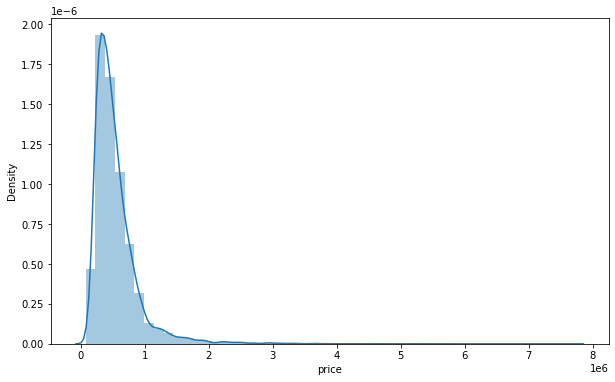

In [293]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

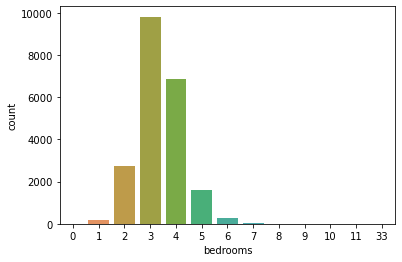

In [294]:
sns.countplot(df['bedrooms'])

In [295]:
df.corr()['price'].sort_values()

zipcode         -0.053182
id              -0.016742
long             0.021613
condition        0.036379
yr_built         0.054006
sqft_lot15       0.082448
sqft_lot         0.089661
yr_renovated     0.126436
floors           0.256814
waterfront       0.266371
lat              0.307010
bedrooms         0.308366
sqft_basement    0.323842
view             0.397299
bathrooms        0.525150
sqft_living15    0.585377
sqft_above       0.605567
grade            0.667434
sqft_living      0.702055
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

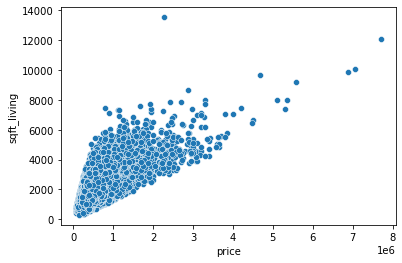

In [296]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

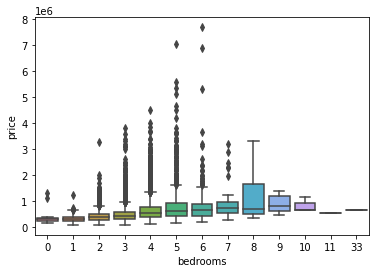

In [297]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [298]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='long'>

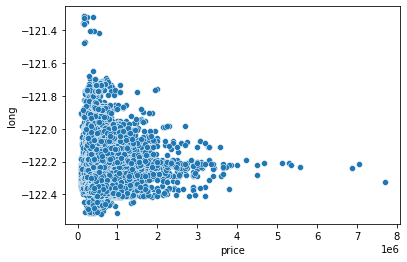

In [299]:
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

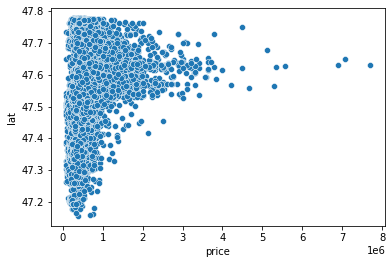

In [300]:
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

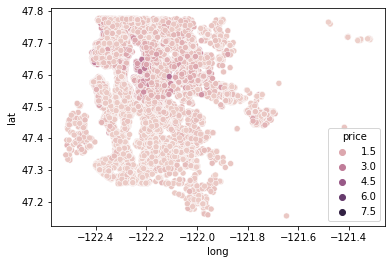

In [301]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [302]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860.0,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200.0,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720.0,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000.0,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990.0,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820.0,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350.0,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430.0,0,2001,0,98004,47.6208,-122.219,3720,14592


In [303]:
len(df)*0.01

216.11

In [304]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

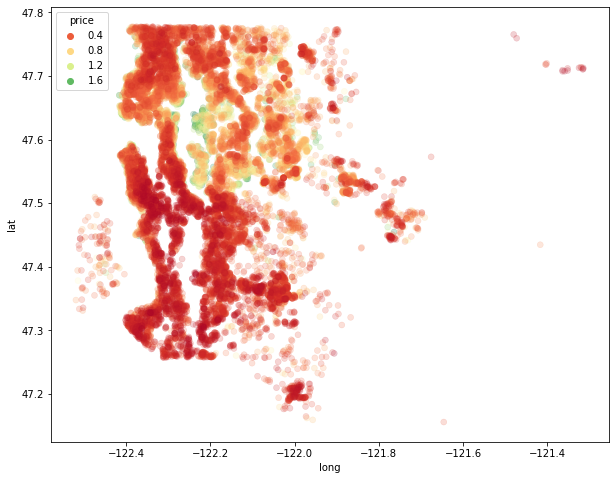

In [305]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

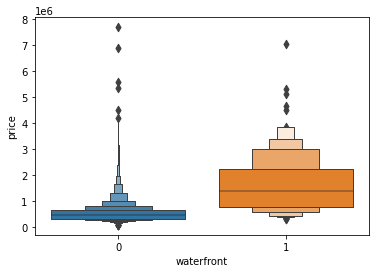

In [306]:
sns.boxenplot(x='waterfront',y='price',data=df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

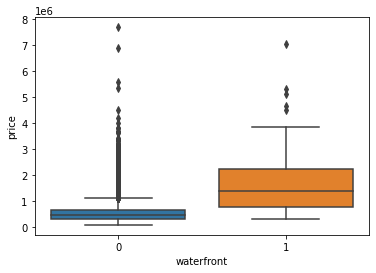

In [307]:
sns.boxplot(x='waterfront',y='price',data=df)

In [308]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [309]:
df = df.drop('id',axis =1)

In [310]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21611, dtype: object

In [311]:
df['date'] = pd.to_datetime(df['date'])

In [312]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21611, dtype: datetime64[ns]

In [313]:
df['year'] = df['date'].apply(lambda date:date.year)

In [314]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21611, dtype: int64

In [315]:
df['month'] = df['date'].apply(lambda date:date.month)

In [316]:
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: month, Length: 21611, dtype: int64

In [317]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

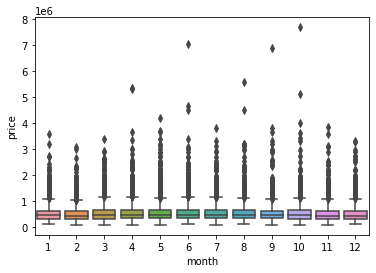

In [318]:
sns.boxplot(x='month',y='price',data=df)

In [319]:
df.groupby('month').mean()['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561792.634978
5     550796.041857
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

In [320]:
df.groupby('month').mean()['price'].sort_values()

month
2     507851.371200
11    521961.009213
12    524461.866757
1     525870.889571
9     529253.821871
8     536445.276804
10    539026.971778
3     543977.187200
7     544788.764360
5     550796.041857
6     558002.199541
4     561792.634978
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

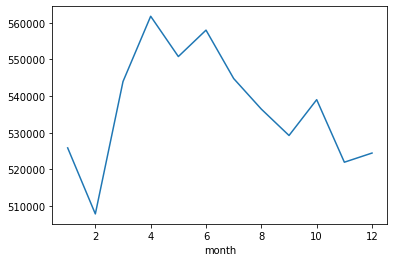

In [321]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

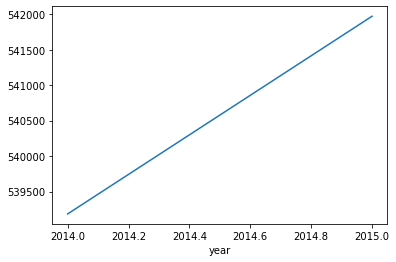

In [322]:
df.groupby('year').mean()['price'].plot()

In [323]:
df = df.drop('date',axis=1)

In [324]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [325]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [326]:
df['zipcode'].value_counts()

98103    601
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [327]:
df = df.drop('zipcode',axis=1)

In [328]:
df['yr_renovated'].value_counts()

0       20697
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [329]:
df['sqft_basement'].value_counts()

0       13125
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [330]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [332]:
from sklearn.preprocessing import MinMaxScaler

In [333]:
scaler = MinMaxScaler()

In [334]:
X_train = scaler.fit_transform(X_train)

In [335]:
X_test = scaler.transform(X_test)

In [336]:
X_train.shape

(15127, 19)

In [337]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [338]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [339]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 442494241450.6667 - val_loss: 425335324672.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 446300631859.2000 - val_loss: 418959556608.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 404139394662.4000 - val_loss: 369649778688.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 339207543193.6000 - val_loss: 228079714304.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 191412508535.4667 - val_loss: 109980532736.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 109926528409.6000 - val_loss: 98465447936.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 107225511492.2667 - val_loss: 96932716544.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 104167396488.5333 - val_loss: 95408201728.0000
Epoch 9/400
119/119

Epoch 68/400
119/119 [==============================] - 0s 1ms/step - loss: 40615295624.5333 - val_loss: 38997405696.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 42845175534.9333 - val_loss: 38743961600.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 35353122372.2667 - val_loss: 38526767104.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 40705420424.5333 - val_loss: 38307897344.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 35383080004.2667 - val_loss: 38106472448.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 38489742284.8000 - val_loss: 37894184960.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 35584053009.0667 - val_loss: 37738033152.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 37410189721.6000 - val_loss: 37531774976.0000
Epoch 76/400
119/119 [==

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 31368945390.9333 - val_loss: 33374283776.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 32126632499.2000 - val_loss: 33401587712.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 31202151168.0000 - val_loss: 33371908096.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 33312511010.1333 - val_loss: 33348108288.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 31058989994.6667 - val_loss: 33244061696.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32932172492.8000 - val_loss: 33257932800.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 31737666201.6000 - val_loss: 33251123200.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32552924825.6000 - val_loss: 33180717056.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31442030233.6000 - val_loss: 32151224320.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31057146828.8000 - val_loss: 32151773184.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 32147170901.3333 - val_loss: 32159680512.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 28763750536.5333 - val_loss: 32141518848.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 29424672785.0667 - val_loss: 32166502400.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 30037667925.3333 - val_loss: 32213295104.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 30388966331.7333 - val_loss: 32102727680.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 30744603665.0667 - val_loss: 32110589952.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 28868156398.9333 - val_loss: 31361976320.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30127731780.2667 - val_loss: 31443664896.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 28741121024.0000 - val_loss: 31544424448.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 29907445486.9333 - val_loss: 31496056832.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 29418837657.6000 - val_loss: 31516409856.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30255610248.5333 - val_loss: 31373375488.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 28000307882.6667 - val_loss: 31394529280.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 27602017553.0667 - val_loss: 31589271552.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 27642768708.2667 - val_loss: 30777765888.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 28787290760.5333 - val_loss: 30625632256.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 27371947494.4000 - val_loss: 30716633088.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 27542278912.0000 - val_loss: 30674235392.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 27917138176.0000 - val_loss: 30649694208.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 28636292454.4000 - val_loss: 30681624576.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 28638565666.1333 - val_loss: 30708480000.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 28225057792.0000 - val_loss: 30617487360.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 25961086020.2667 - val_loss: 29976889344.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 27030099080.5333 - val_loss: 29904332800.0000


In [340]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

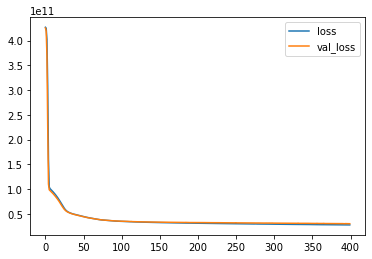

In [341]:
losses.plot()

In [342]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [343]:
predictions = model.predict(X_test)

In [344]:
mean_squared_error(y_test,predictions)

29904330625.293415

In [345]:
mean_absolute_error(y_test,predictions)

103778.0462478553

In [348]:
np.sqrt(mean_squared_error(y_test,predictions))

172928.68653087437

In [350]:
df['price'].describe()

count    2.161100e+04
mean     5.400850e+05
std      3.671430e+05
min      7.500000e+04
25%      3.217250e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [351]:
explained_variance_score(y_test,predictions)

0.7750307009194032

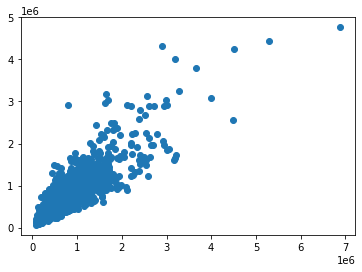

In [353]:
plt.scatter(y_test,predictions)

In [358]:
single_house = df.drop('price',axis=1).iloc[0]

In [362]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [364]:
model.predict(single_house)

array([[280923.6]], dtype=float32)

In [365]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650,2014,10
